In [9]:
import cv2
import numpy as np
from PIL import Image

import sys
from google.colab import drive
drive.mount('/content/drive') #authorize google drive
sys.path.append('/content/drive/MyDrive/MyProject/') #the storage path of my own modules

from unet import get_unet
from util import *
from pre_processing import *
import matplotlib.pyplot as plt


if __name__ == '__main__':

  # parameters and paths
  # DRIVE resize:(576, 576)
  # HRF resize:(2920, 2920)
  # IOSTAR resize:(1024, 1024)
  resize_height, resize_width = (576, 576)
  # DRIVE patch size:48
  # HRF patch size:292
  # IOSTAR resize:64
  dx = 48
  # dataset option: DRIVE, HRF and IOSTAR
  dataset = "DRIVE"
  # read images used for prediction
  
  img_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/images/'
  label_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/1st_manual/'
  # mask_path = '/content/drive/MyDrive/MyProject/DRIVE/test/mask'

  # read the data and resize them
  imglst,images = read_image_and_name(img_path)
  labellst,labels = read_label_and_name(label_path)
  imgs_resize = resize(images,resize_height,resize_width)

  # convert the list imgs and manuals to the numpy array
  X_test_set = np.array(imgs_resize)
  Y_test_set = np.array(labels)
  print(X_test_set.shape)
  print(Y_test_set.shape)

  # do the standardization to the image, each pixel value will be
  # restricted within 0 to 1
  X_test_set = X_test_set.astype('float32')/255
  Y_test_set = Y_test_set.astype('float32')/255

  # do the pre-processing operations to the training images
  X_test_set = my_PreProc(X_test_set)

  plt.figure()
  plt.imshow(X_test_set[0,:,:,0],'gray')
  plt.show()

  plt.figure()
  plt.imshow(Y_test_set[0,:,:],'gray')
  plt.show()

  for k in range(X_test_set.shape[0]):
    X_test = X_test_set[k,...]
    Y_test = Y_test_set[k,...]
    # crop images to be predicted to (144,48,48), the row order first
    list = []
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            list.append(X_test[i*dx:(i+1)*dx, j*dx:(j+1)*dx])
    X_test = np.array(list)[:,np.newaxis,...] #increase one dimension, it will become (144,1,48,48)
    print('input shape: '+str(X_test.shape))

    # load the model and weights and make prediction then
    n_labels = 2
    model = get_unet(1,dx,dx,n_labels)
    model.load_weights('/content/drive/MyDrive/MyProject/'+dataset+'/'+dataset+'_best_weights.h5')
    Y_pred = model.predict(X_test)
    # the shape of prediction results is (Npatches,patch_height*patch_width,2)
    print('predict shape: '+str(Y_pred.shape))

    # concatenate and restore the predicted output
    # numpy array and display it again

    # use the binary classifier to extract foreground,
    # currently the shape of Y_pred is (144,2304), where 144 is spliced as the row order first
    Y_pred = Y_pred[..., 0]

    # concatenate prediction results, combine multiple (144,2304) to (576,576)
    t=0
    image = np.zeros((resize_height,resize_width))
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            temp = Y_pred[t].reshape(dx,dx)
            image[i*dx:(i+1)*dx, j*dx:(j+1)*dx] = temp
            t = t+1
    image = cv2.resize(image,((Y_test.shape[1], Y_test.shape[0])))
    # restore the resolution 576 by 576 to the original image size
    plt.figure(figsize=(12,12))
    subfig1 = plt.subplot(1,2,1) 
    plt.imshow(image,'gray')
    subfig1.set_title(imglst[k][-11:-9]+' Prediction result(test dataset)')
    subfig2 = plt.subplot(1,2,2) 
    plt.imshow(Y_test,'gray')
    subfig2.set_title(imglst[k][-11:-9]+' Groundtruth(test dataset)')
    plt.savefig('/content/drive/MyDrive/MyProject/'+dataset+'/'+imglst[k][-11:-9]+'_prediction.png')
    plt.show()
  #Evaluate the results
  #Y_test_mask = read_image_and_name(mask_path)
  #print("\n\n==============Evaluate the results================")
  #predictions only inside the FOV
  #y_scores,y_true = pred_only_FOV()

  

Output hidden; open in https://colab.research.google.com to view.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 26_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 28_ODN.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 30_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 31_ODN.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 32_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 34_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 36_OSC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 37_ODN.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 38_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 39_ODC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 40_OSC.jpg', '/content/drive/MyDrive/MyProject/IOSTAR/test/images/STAR 43_OSC.jpg', '/content/drive/My

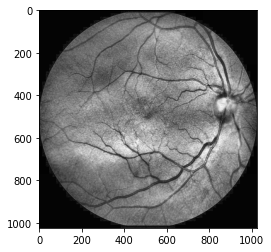

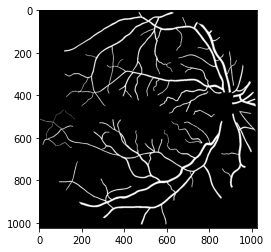

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


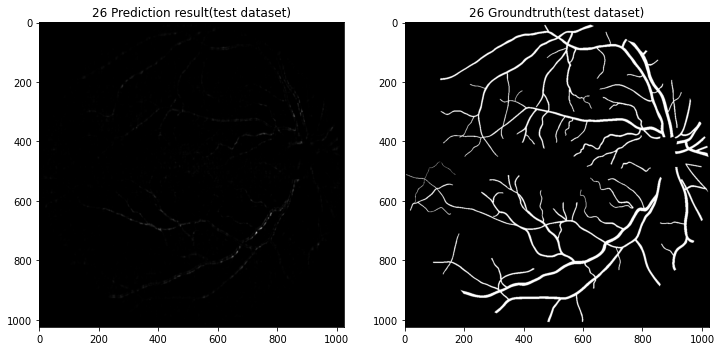

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


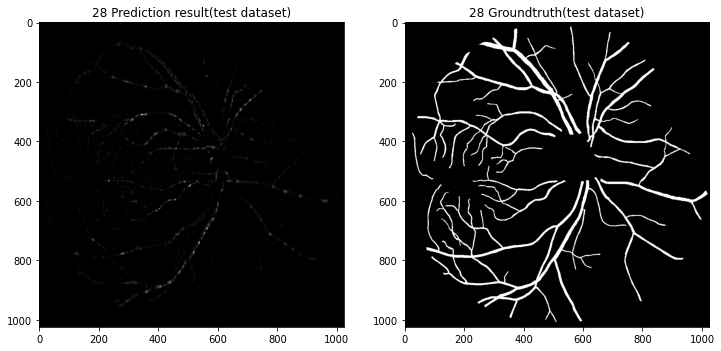

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


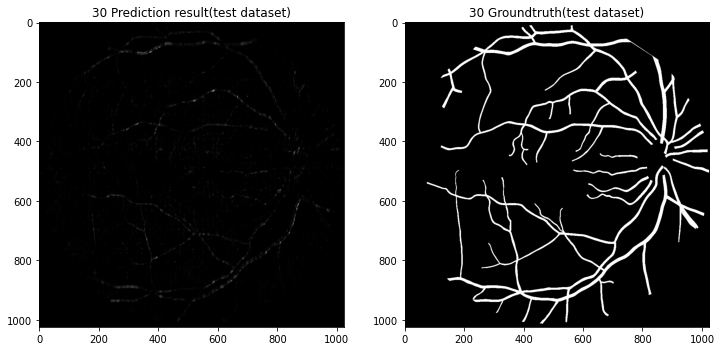

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


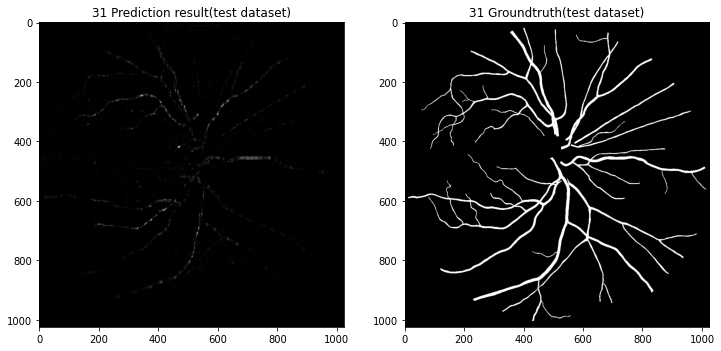

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


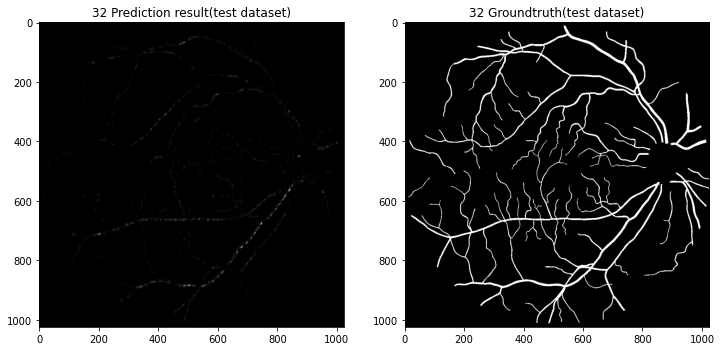

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


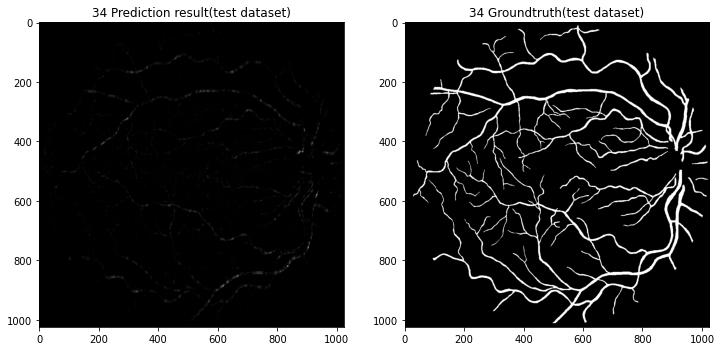

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


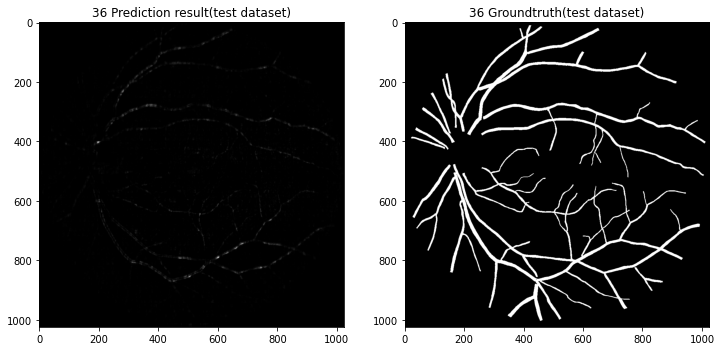

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


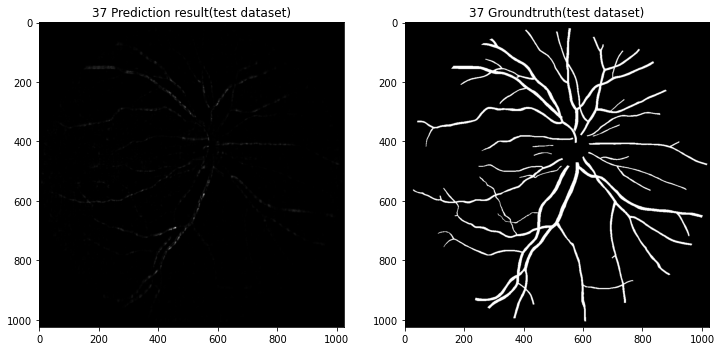

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


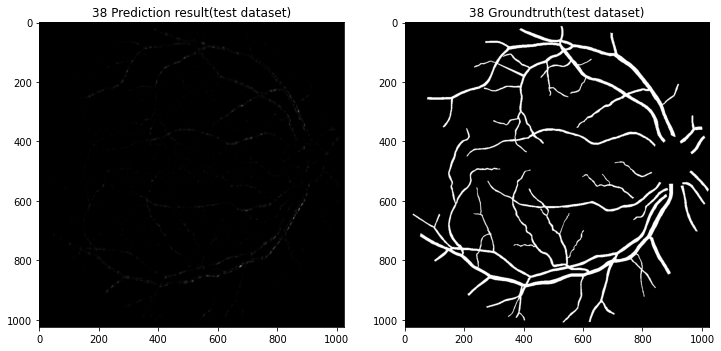

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


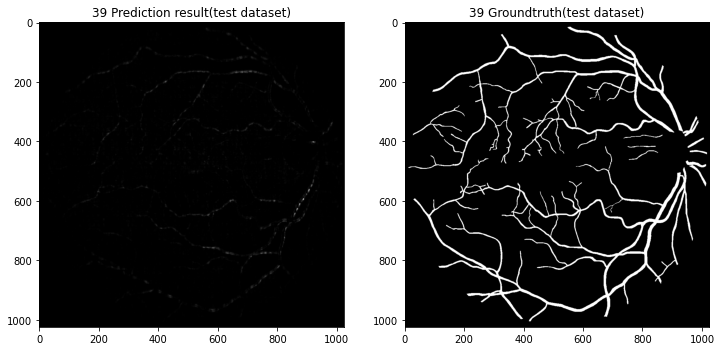

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


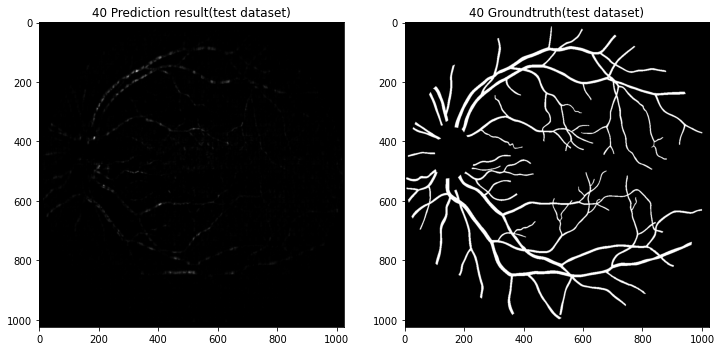

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


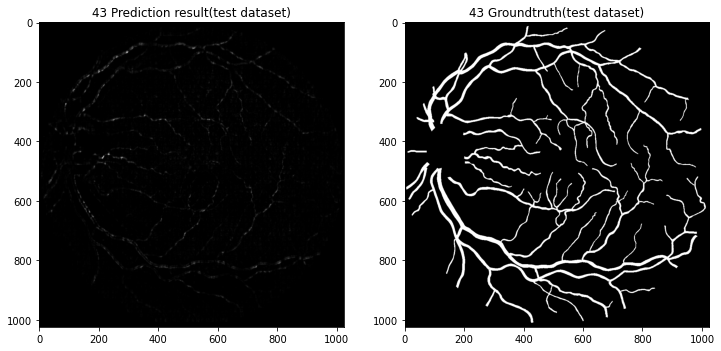

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


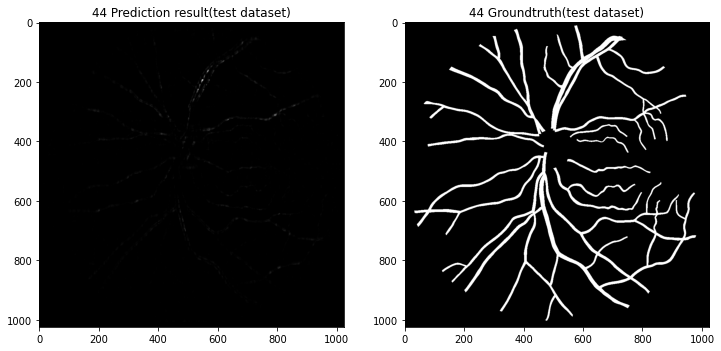

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


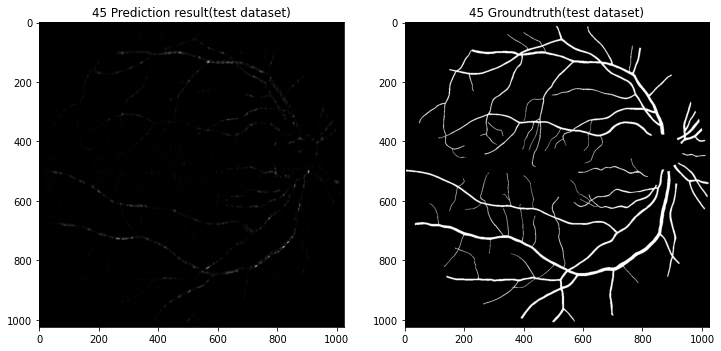

input shape: (4096, 1, 16, 16, 1)
predict shape: (4096, 256, 2)


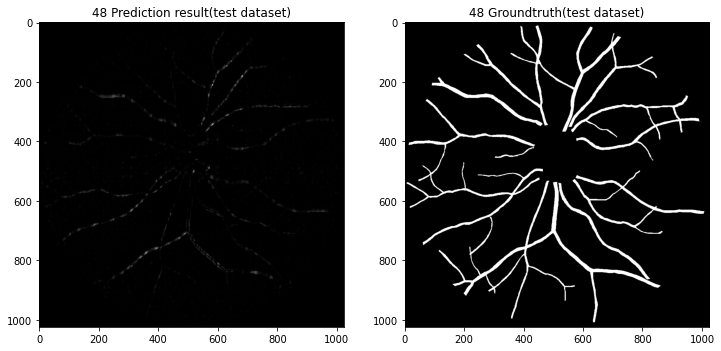

In [ ]:
import cv2
import numpy as np
from PIL import Image

import sys
from google.colab import drive
drive.mount('/content/drive') #authorize google drive
sys.path.append('/content/drive/MyDrive/MyProject/') #the storage path of my own modules

from unet import get_unet
from util import *
from pre_processing import *
import matplotlib.pyplot as plt


if __name__ == '__main__':

  # parameters and paths
  # DRIVE resize:(576, 576)
  # HRF resize:(2920, 2920)
  # IOSTAR resize:(1024, 1024)
  resize_height, resize_width = (1024, 1024)
  # DRIVE patch size:48
  # HRF patch size:292
  # IOSTAR patch size:16
  dx = 16
  # dataset option: DRIVE, HRF and IOSTAR
  dataset = "IOSTAR"
  # read images used for prediction
  
  img_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/images/'
  label_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/1st_manual/'
  # mask_path = '/content/drive/MyDrive/MyProject/DRIVE/test/mask'

  # read the data and resize them
  imglst,images = read_image_and_name(img_path)
  labellst,labels = read_label_and_name(label_path)
  imgs_resize = resize(images,resize_height,resize_width)

  # convert the list imgs and manuals to the numpy array
  X_test_set = np.array(imgs_resize)
  Y_test_set = np.array(labels)
  print(X_test_set.shape)
  print(Y_test_set.shape)

  # do the standardization to the image, each pixel value will be
  # restricted within 0 to 1
  X_test_set = X_test_set.astype('float32')/255
  Y_test_set = Y_test_set.astype('float32')/255

  # do the pre-processing operations to the training images
  X_test_set = my_PreProc(X_test_set)

  plt.figure()
  plt.imshow(X_test_set[0,:,:,0],'gray')
  plt.show()

  plt.figure()
  plt.imshow(Y_test_set[0,:,:],'gray')
  plt.show()

  
  for k in range(X_test_set.shape[0]):
    X_test = X_test_set[k,...]
    Y_test = Y_test_set[k,...]
    # crop images to be predicted to (144,48,48), the row order first
    list = []
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            list.append(X_test[i*dx:(i+1)*dx, j*dx:(j+1)*dx])
    X_test = np.array(list)[:,np.newaxis,...] #increase one dimension, it will become (144,1,48,48)
    print('input shape: '+str(X_test.shape))

    # load the model and weights and make prediction then
    model = get_unet(1,dx,dx)
    model.load_weights('/content/drive/MyDrive/MyProject/'+dataset+'/'+dataset+'_best_weights.h5')
    Y_pred = model.predict(X_test)
    # the shape of prediction results is (Npatches,patch_height*patch_width,2)
    print('predict shape: '+str(Y_pred.shape))

    # concatenate and restore the predicted output
    # numpy array and display it again

    # use the binary classifier to extract foreground,
    # currently the shape of Y_pred is (144,2304), where 144 is spliced as the row order first
    Y_pred = Y_pred[..., 0]

    # concatenate prediction results, combine multiple (144,2304) to (576,576)
    t=0
    image = np.zeros((resize_height,resize_width))
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            temp = Y_pred[t].reshape(dx,dx)
            image[i*dx:(i+1)*dx, j*dx:(j+1)*dx] = temp
            t = t+1
    image = cv2.resize(image,((Y_test.shape[1], Y_test.shape[0])))
    # restore the resolution 576 by 576 to the original image size
    plt.figure(figsize=(12,12))
    subfig1 = plt.subplot(1,2,1) 
    plt.imshow(image,'gray')
    subfig1.set_title(imglst[k][-10:-8]+' Prediction result(test dataset)')
    subfig2 = plt.subplot(1,2,2) 
    plt.imshow(Y_test,'gray')
    subfig2.set_title(imglst[k][-10:-8]+' Groundtruth(test dataset)')
    plt.savefig('/content/drive/MyDrive/MyProject/'+dataset+'/'+imglst[k][-10:-8]+'_prediction.png')
    plt.show()
  #Evaluate the results
  #Y_test_mask = read_image_and_name(mask_path)
  #print("\n\n==============Evaluate the results================")
  #predictions only inside the FOV
  #y_scores,y_true = pred_only_FOV()
  
  

In [ ]:
import cv2
import numpy as np
from PIL import Image

import sys
from google.colab import drive
drive.mount('/content/drive') #authorize google drive
sys.path.append('/content/drive/MyDrive/MyProject/') #the storage path of my own modules

from unet import get_unet
from util import *
from pre_processing import *
import matplotlib.pyplot as plt


if __name__ == '__main__':

  # parameters and paths
  # DRIVE resize:(576, 576)
  # HRF resize:(2920, 2920)
  # IOSTAR resize:(1024, 1024)
  resize_height, resize_width = (2336, 2336)
  # DRIVE patch size:48
  # HRF patch size:292
  # IOSTAR patch size:32
  dx = 32
  # dataset option: DRIVE, HRF and IOSTAR
  dataset = "HRF"
  # read images used for prediction
  
  img_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/images/'
  label_path = '/content/drive/MyDrive/MyProject/'+dataset+'/test/1st_manual/'
  # mask_path = '/content/drive/MyDrive/MyProject/DRIVE/test/mask'

  # read the data and resize them
  imglst,images = read_image_and_name(img_path)
  labellst,labels = read_label_and_name(label_path)
  imgs_resize = resize2SquareKeepingAspectRation(images,resize_height,cv2.INTER_AREA)
  labels_resize = resize2SquareKeepingAspectRation(labels,resize_height,cv2.INTER_AREA)

  # convert the list imgs and manuals to the numpy array
  X_test_set = np.array(imgs_resize)
  Y_test_set = np.array(labels_resize)
  print(X_test_set.shape)
  print(Y_test_set.shape)

  # do the standardization to the image, each pixel value will be
  # restricted within 0 to 1
  X_test_set = X_test_set.astype('float32')/255
  Y_test_set = Y_test_set.astype('float32')/255

  # do the pre-processing operations to the training images
  X_test_set = my_PreProc(X_test_set)

  plt.figure()
  plt.imshow(X_test_set[0,:,:,0],'gray')
  plt.show()

  plt.figure()
  plt.imshow(Y_test_set[0,:,:],'gray')
  plt.show()

  
  for k in range(X_test_set.shape[0]):
    X_test = X_test_set[k,...]
    Y_test = Y_test_set[k,...]
    # crop images to be predicted to (144,48,48), the row order first
    list = []
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            list.append(X_test[i*dx:(i+1)*dx, j*dx:(j+1)*dx])
    X_test = np.array(list)[:,np.newaxis,...] #increase one dimension, it will become (144,1,48,48)
    print('input shape: '+str(X_test.shape))

    # load the model and weights and make prediction then
    model = get_unet(1,dx,dx)
    model.load_weights('/content/drive/MyDrive/MyProject/'+dataset+'/'+dataset+'_best_weights.h5')
    Y_pred = model.predict(X_test)
    # the shape of prediction results is (Npatches,patch_height*patch_width,2)
    print('predict shape: '+str(Y_pred.shape))

    # concatenate and restore the predicted output
    # numpy array and display it again

    # use the binary classifier to extract foreground,
    # currently the shape of Y_pred is (144,2304), where 144 is spliced as the row order first
    Y_pred = Y_pred[..., 0]

    # concatenate prediction results, combine multiple (144,2304) to (576,576)
    t=0
    image = np.zeros((resize_height,resize_width))
    for i in range(resize_height//dx):
        for j in range(resize_width//dx):
            temp = Y_pred[t].reshape(dx,dx)
            image[i*dx:(i+1)*dx, j*dx:(j+1)*dx] = temp
            t = t+1
    image = cv2.resize(image,((Y_test.shape[1], Y_test.shape[0])))
    # restore the resolution 576 by 576 to the original image size
    plt.figure(figsize=(12,12))
    subfig1 = plt.subplot(1,2,1) 
    plt.imshow(image,'gray')
    subfig1.set_title(imglst[k][49:-4]+' Prediction result(test dataset)')
    subfig2 = plt.subplot(1,2,2) 
    plt.imshow(Y_test,'gray')
    subfig2.set_title(imglst[k][49:-4]+' Groundtruth(test dataset)')
    plt.savefig('/content/drive/MyDrive/MyProject/'+dataset+'/'+imglst[k][49:-4]+'_prediction.png')
    plt.show()
  #Evaluate the results
  #Y_test_mask = read_image_and_name(mask_path)
  #print("\n\n==============Evaluate the results================")
  #predictions only inside the FOV
  #y_scores,y_true = pred_only_FOV()

Output hidden; open in https://colab.research.google.com to view.